# Evaluation Results:
#### SchemaTree recommender and wikidata PropertySuggester evaluation results for the 2019-07-29 wikidata dump
Loading and preparing the evaluation results:

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# load data sets
counts  = pd.read_csv("results/wiki_counts.csv",encoding = "ISO-8859-1", skipinitialspace=True, sep=" ", header=None,names=["count","numNonTypes","trash"])
prefix = "results/wikidata-20190729-all-item-filtered-sorted-1in1000-test-r1-"
df_recommender   = pd.read_csv(prefix+"standard-takeMoreButCommon-numNonTypes-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_typed         = pd.read_csv(prefix+"typed-takeMoreButCommon-numNonTypes-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_typed_backoff = pd.read_csv(prefix+"typed-tooFewRecs-takeMoreButCommon-numNonTypes-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_wikisuggester = pd.read_csv(prefix+"wikidata-takeMoreButCommon-numNonTypes-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_wikisuggester2= pd.read_csv(prefix+"wikidata2-takeMoreButCommon-numNonTypes-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)

# extend information
df_recommender['Recommender']='Standard'
df_typed['Recommender']='Typed'
df_typed_backoff['Recommender']='Typed \& Backoff'
df_wikisuggester['Recommender']='Wikidata PS' 
df_wikisuggester2['Recommender']='PS wo/ Types' 

# combine results
df_combined = pd.concat([
    df_recommender,
    df_typed,
    df_typed_backoff,
    df_wikisuggester,
    df_wikisuggester2,
])

# compute F1 & reciprocal rank
df_combined["f1"]=2*df_combined["precisionAtL"]*df_combined["recall"]/(df_combined["precisionAtL"]+df_combined["recall"])
df_combined["RR"]=1/df_combined["mean"]

#filter the aggregated columns
group = df_combined.columns[0]
aggregated = df_combined[df_combined[group]==-1]
df_combined = df_combined[df_combined[group] >=0]

#### Summary results of the different recommenders over all evaluated recommendation requests:

In [2]:
aggregated.iloc[:, [14,1,3,5,6,7,8,9,10,11,13,15,16,2]]

,Recommender,subjects,mean,median,stddev,top1,top5,top10,topL,recall,precisionAtL,f1,RR,duration
0,Standard,400964,7.9982,1.0,40.4279,67.1419,83.3801,89.7592,77.6374,98.7878,56.4788,71.868855,0.125028,119.6637
0,Typed,400964,6.7335,1.0,46.2512,78.9654,93.0744,96.0168,87.1589,98.8185,67.8991,80.491648,0.148511,25.0065
0,Typed \& Backoff,400964,3.7847,1.0,24.3785,79.0650,93.2979,96.3239,87.4029,99.4307,67.9962,80.762527,0.264222,25.7258
0,Wikidata PS,400964,13.0458,1.0,70.8359,74.3446,90.1121,93.2765,83.6467,94.8197,64.5717,76.825591,0.076653,29.1839
0,PS wo/ Types,400964,156.6705,72.0,179.0394,3.8335,10.1545,12.6373,10.9698,58.9918,3.3053,6.259861,0.006383,350.5845


#### Create detailed plot of interesting metrics:

(0, 405)

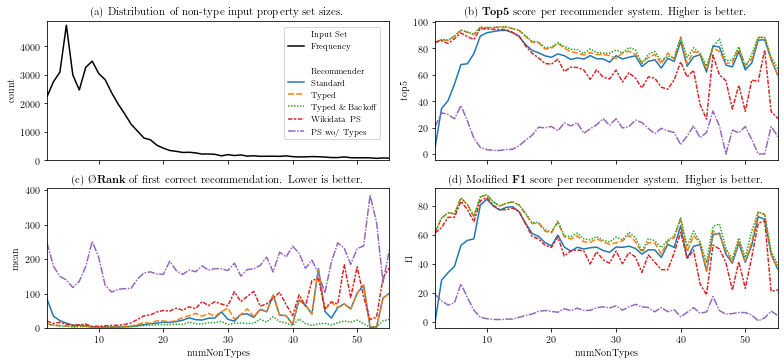

In [3]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(11, 5), sharex=True)

ax = axes.flat[0]
ax.set_xlim(2,55)
ax.set_ylim(0,4900)
cline = sns.lineplot(
    x=counts["numNonTypes"], 
    y="count", 
    data=counts,
    color="black",
    ax=ax,
)
   
for axx, column in zip(axes.flat[1:], df_combined[["top5","mean","f1"]]):
    sns.lineplot(
        x=group, 
        y=column, 
        hue="Recommender",
        data=df_combined, 
        style="Recommender",
        ax=axx,
    )
    axx.set_xlim(2,55)
    axx.get_legend().remove()

f.tight_layout()

handles, labels = axx.get_legend_handles_labels()
handles = [ handles[0], cline.get_lines()[0], handles[0]] + handles
labels  = ['Input Set', 'Frequency',''] + labels
f.legend(handles, labels, loc='center right', bbox_to_anchor=(0.485, 0.78), fontsize='small')

labels = [
    r'(a) Distribution of non-type input property set sizes.',
    r'(b) $\mathbf{Top5}$ score per recommender system. Higher is better.',
    r'(c) $\mathbf{ØRank}$ of first correct recommendation. Lower is better.',
    r'(d) Modified $\mathbf{F1}$ score per recommender system. Higher is better.',
]
for ax, label in zip(axes.flat, labels):
    ax.set_title(label, fontsize=11)

plt.subplots_adjust(hspace=0.2)
axes.flat[2].set_ylim(0,405)

# f.savefig('combined.pdf', bbox_inches='tight')

#### Create and save additional detailed plots:

(0, 4900)

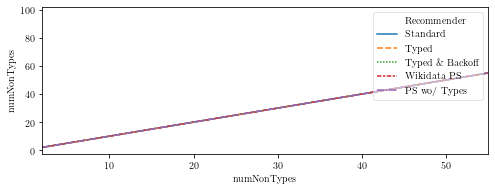

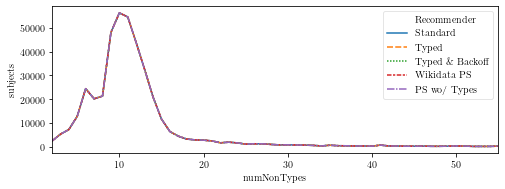

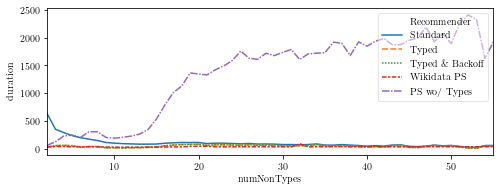

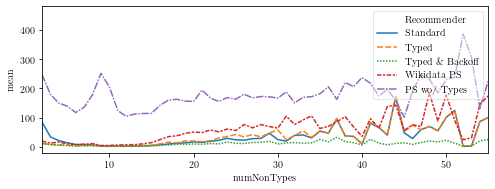

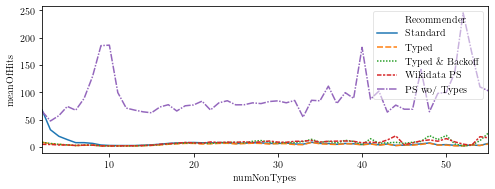

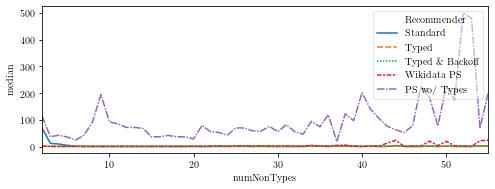

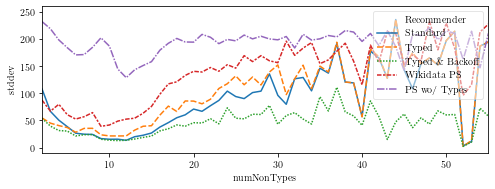

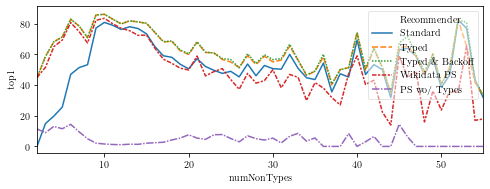

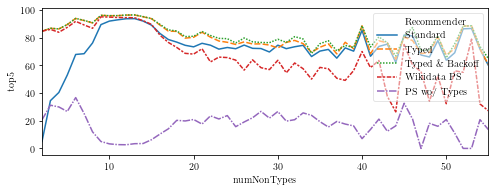

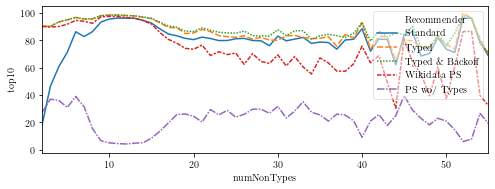

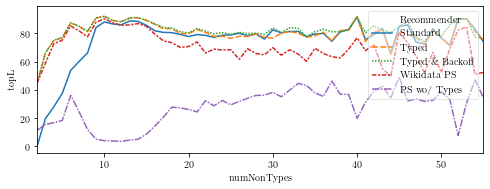

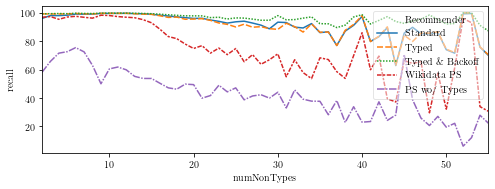

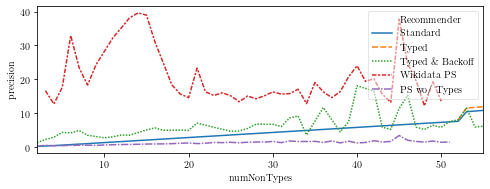

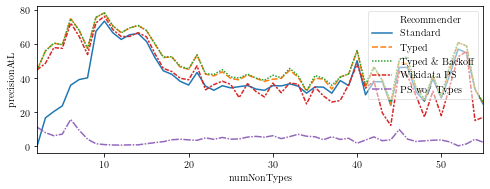

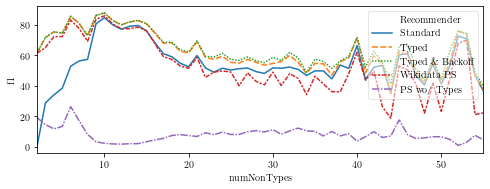

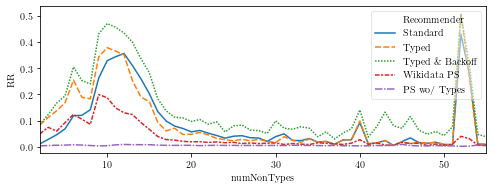

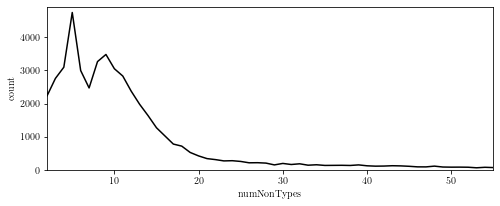

In [4]:
for column in df_combined[df_combined.columns[~df_combined.columns.isin(['Recommender'])]]:
    
    plt.figure(num=None, figsize=(8, 3))
    g = sns.lineplot(
        x=group, 
        y=column, 
        hue="Recommender",
        data=df_combined, 
        style ="Recommender",
    )
    ax = g.axes
    ax.set_xlim(2,55)
    ax.legend(fancybox=True, framealpha=0.5, loc='upper right')
    
    plt.subplots_adjust(bottom=0.2)
#     plt.savefig(column+'.pdf', bbox_inches='tight')

plt.figure(num=None, figsize=(8, 3))
g = sns.lineplot(
    x=counts["numNonTypes"], 
    y=counts["count"], 
    data=counts,
    color="black",
)
ax = g.axes
ax.set_xlim(2,55)
ax.set_ylim(0,4900)
# plt.savefig('counts.pdf', bbox_inches='tight')

#### Detailed evaluation results:

In [5]:
df_combined

,numNonTypes,subjects,duration,mean,meanOfHits,median,stddev,top1,top5,top10,topL,recall,precision,precisionAtL,Recommender,f1,RR
1,2,2300,636.4371,84.7178,67.8059,70.0,108.0472,0.0435,5.0000,17.8696,0.0435,96.0870,0.1922,0.0435,Standard,0.086961,0.011804
2,3,5186,351.1077,34.6030,31.5316,12.0,66.7403,14.8477,34.4582,46.4134,19.7455,98.1103,0.3262,16.7759,Standard,28.652503,0.028899
3,4,7143,288.4289,21.5090,19.5585,10.0,50.5120,19.7536,40.3472,60.6888,28.0974,98.0727,0.4408,20.4886,Standard,33.895923,0.046492
4,5,12736,234.1005,14.4651,13.5102,5.0,38.5949,25.5967,52.9130,71.1526,37.6099,98.4041,0.5719,23.7653,Standard,38.284594,0.069132
5,6,24400,195.3563,8.4286,7.8841,2.0,26.5874,46.9344,67.7869,86.2049,53.8607,99.1653,NaN,35.9117,Standard,52.728362,0.118644
6,7,20118,170.2700,8.2998,7.8840,1.0,24.7149,51.3272,68.3368,82.6573,60.1849,99.1049,NaN,39.1901,Standard,56.168783,0.120485
7,8,21266,145.5627,7.0561,6.5688,1.0,24.2597,53.2258,76.0651,86.3162,66.1855,99.1890,NaN,40.2030,Standard,57.215556,0.141721
8,9,48080,110.6961,3.8091,3.5613,1.0,16.6533,77.0799,89.3324,93.3007,84.1077,99.6144,NaN,67.4790,Standard,80.456560,0.262529
9,10,56322,98.7294,3.0468,2.7731,1.0,15.4326,80.7606,91.8593,95.5559,88.1236,99.6557,NaN,73.4399,Standard,84.562573,0.328213
10,11,54600,89.4733,2.9136,2.6312,1.0,15.5317,78.8462,92.7802,96.1630,86.6685,99.6544,NaN,66.6133,Standard,79.850848,0.343218
